In [146]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
#Q1
#Generate data
np.random.seed(10)
error=np.random.randn(100)
x=np.array(range(100))
y=x+error
y=y.reshape(-1,1)
X=np.array([x,x**2,x**3])
X=np.transpose(X)
#spilt test set
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

#Q1.1&2
reg = LinearRegression()
#Full Model
reg.fit(x_train, y_train)
y_train_pre = reg.predict(x_train)
y_test_pre=reg.predict(x_test)
MSE_train=mean_squared_error(y_train, y_train_pre)
MSE_test=mean_squared_error(y_test, y_test_pre)
print("Training MSE for Full Model:",str(MSE_train) )
print("Test MSE for Full Model:",str(MSE_test))
#The Ruduced Model
x_train=x_train[:,0:3]
x_test=x_test[:,0:3]
reg.fit(x_train, y_train)
y_train_pre = reg.predict(x_train)
y_test_pre=reg.predict(x_test)
MSE_train=mean_squared_error(y_train, y_train_pre)
MSE_test=mean_squared_error(y_test, y_test_pre)
print("Training MSE for Reduced Model:",str(MSE_train) )
print("Test MSE for Reduced Model:",str(MSE_test))

Training MSE for Full Model: 0.9570394331149934
Test MSE for Full Model: 0.8187293060282064
Training MSE for Reduced Model: 0.9570394331149934
Test MSE for Reduced Model: 0.8187293060282064


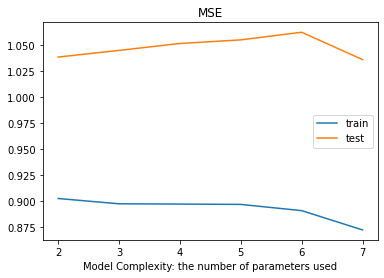

In [147]:
#Q1.3(a)
X=np.array([x,x**2,x**3,x**4,x**5,x**6])
X=np.transpose(X)
parameters=[7,6,5,4,3,2]
train_MSE=[]
test_MSE=[]
reg = LinearRegression()

for i in parameters:
    #spilt test set
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state =1)
    reg.fit(x_train, y_train)
    y_train_pre = reg.predict(x_train)
    y_test_pre=reg.predict(x_test)
    train_MSE.append(mean_squared_error(y_train, y_train_pre))
    test_MSE.append(mean_squared_error(y_test, y_test_pre))
    X= np.delete(X, -1, axis=1)
    
plt.plot(parameters, train_MSE, label = "train")
plt.plot(parameters, test_MSE, label = "test")
plt.xlabel('Model Complexity: the number of parameters used')
plt.title('MSE')
plt.legend()
plt.show()
    

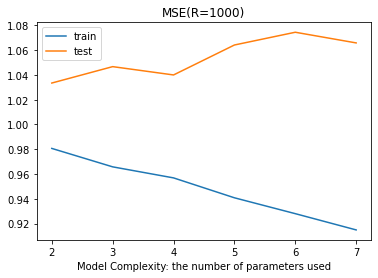

In [148]:
#Q1.3(b)
X=np.array([x,x**2,x**3,x**4,x**5,x**6])
X=np.transpose(X)
parameters=[7,6,5,4,3,2]
train_MSE=np.ones((1000,6))
test_MSE=np.ones((1000,6))
reg = LinearRegression()


for i in range(6):
    for R in range(1000):
        error=np.random.randn(100)
        x=np.array(range(100))
        y=x+error
    #spilt test set
        x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state =1)
        reg.fit(x_train, y_train)
        y_train_pre = reg.predict(x_train)
        y_test_pre=reg.predict(x_test)
        train_MSE[R][i]=mean_squared_error(y_train, y_train_pre)
        test_MSE[R][i]=mean_squared_error(y_test, y_test_pre)
    X= np.delete(X, -1, axis=1)
    
train_MSE=np.mean(train_MSE,axis=0)    
test_MSE=np.mean(test_MSE,axis=0)   
plt.plot(parameters, train_MSE, label = "train")
plt.plot(parameters, test_MSE, label = "test")
plt.xlabel('Model Complexity: the number of parameters used')
plt.title('MSE(R=1000)')
plt.legend()
plt.show()
